In [35]:
from numpy.linalg import inv, solve
from numpy import zeros, dot, array, append
import numpy as np

In [36]:
def set_matrix(nodes=5, geometry="cartesian", D=9.0, w=10.0, sigma=0.15):
    deltaX = w / (nodes - 1.0)
    n = nodes
    
    matrix = zeros((n,n))
    if geometry == "cartesian":
        matrix[0][0] = D / deltaX ** 2.0 + 0.5 * sigma
        matrix[0][1] = -1.0 * D / deltaX ** 2.0
        for i in range(1, n-1):
            matrix[i][i] = 2 * D / deltaX ** 2 + sigma
            matrix[i][i-1] = -1.0 * D / deltaX ** 2
            matrix[i][i+1] = -1.0 * D / deltaX ** 2
        matrix[n-1][n-1] = D / deltaX ** 2.0 + 0.5 * sigma
        matrix[n-1][n-2] = -1.0 * D / deltaX ** 2.0

    return matrix

In [37]:
def flux(nodes=5, geometry="cartesian", D=9.0, w=10.0, sigma=0.15):
    n = nodes
    A = set_matrix(nodes=nodes, geometry=geometry, D=D, w=w, sigma=sigma)
    S_vector = zeros(n)
    S = 10.0 ** 8
    S_vector[0] = S / (2.0 * w / n)
    
    return dot(inv(A), S_vector)

In [49]:
flux()

array([ 61898181.43928751,  47760933.94480594,  38598783.73624168,
        33457340.16686924,  31801036.19821234])

In [39]:
%matplotlib inline

In [40]:
import matplotlib.pyplot as plt
fig_size = []
fig_size.append(15)
fig_size.append(10)
plt.rcParams["figure.figsize"] = fig_size

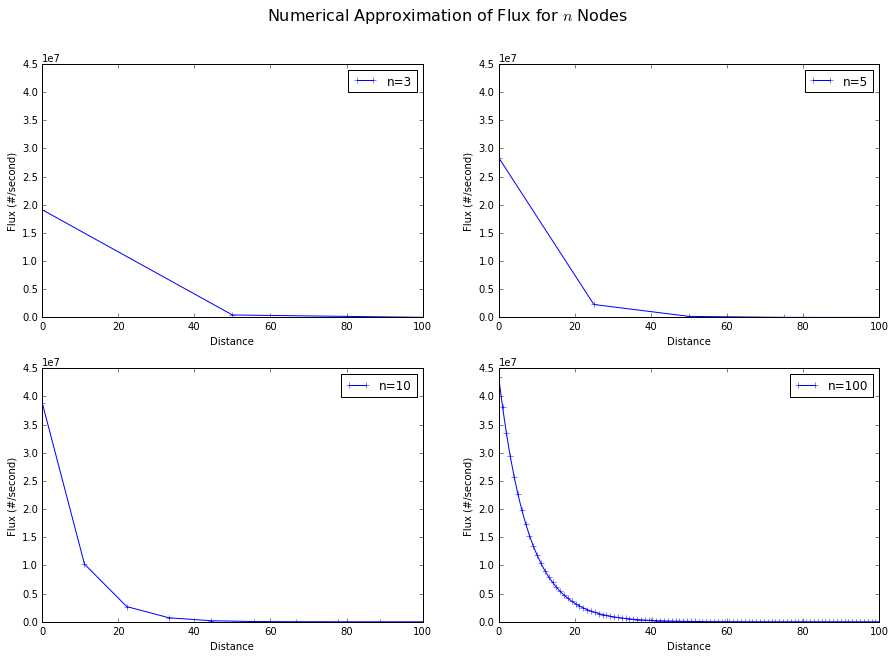

In [41]:
W = 100
def x(n):
    return np.linspace(0, W, n)

fig = plt.figure(1)
plt.suptitle("Numerical Approximation of Flux for $n$ Nodes", size=16)

a = plt.subplot(221)
plt.plot(x(3), flux(nodes=3, w=W), 'b-+', label="n=3")
plt.legend(loc='upper right')
plt.xlabel('Distance')
plt.ylabel('Flux (#/second)')

b = plt.subplot(222, sharey=a)
plt.plot(x(5), flux(nodes=5, w=W), 'b-+', label="n=5")
plt.legend(loc='upper right')
plt.ylabel('Flux (#/second)')
plt.xlabel('Distance')

c = plt.subplot(224, sharey=a)
plt.plot(x(100), flux(nodes=100, w=W), 'b-+', label="n=100")
plt.legend(loc='upper right')
plt.ylabel('Flux (#/second)')
plt.xlabel('Distance')

d = plt.subplot(223, sharey=a)
plt.plot(x(10), flux(nodes=10, w=W), 'b-+', label="n=10")
plt.legend(loc='upper right')
plt.ylabel('Flux (#/second)')
plt.xlabel('Distance')

plt.show()

## Analytical Solution for Cartesian Coordinates ##

In [42]:
def phi_analytic(x, S, w, sigma):
    D = 9.0 # 1.0 / (3.0 * sigma)
    L = (D / sigma) ** 0.5
    
    constant = S * L / (2.0 * D)
    numerator = np.exp(-x / L) - np.exp((x - 2.0 * w) / L)
    denominator = 1.0 - np.exp(-2.0 * w / L)
    
    return constant * numerator / denominator

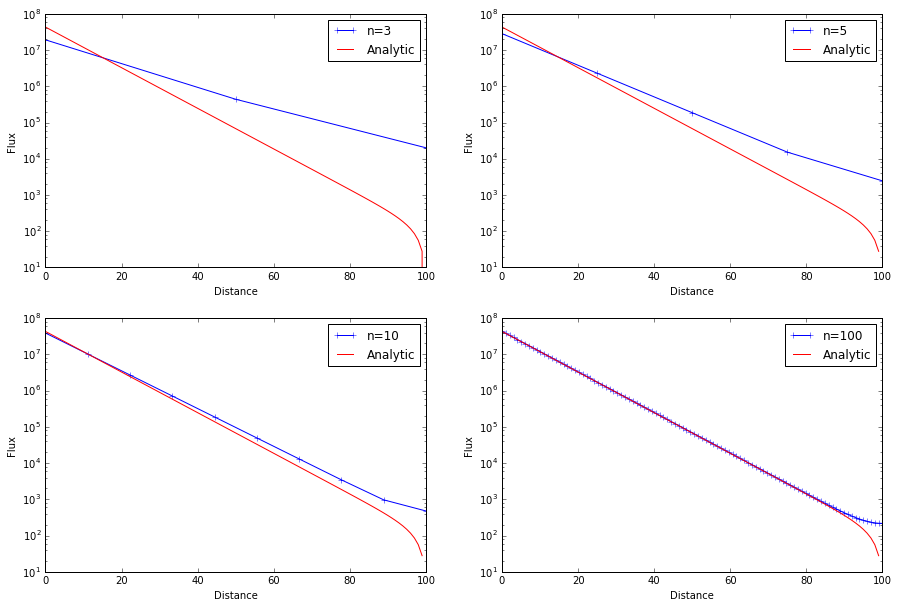

In [43]:
W = 100
def x(n):
    return np.linspace(0, W, n)

fig = plt.figure(1)
# plt.suptitle("Flux vs. Distance for $n$ Nodes", size=16)

a = plt.subplot(221)
plt.plot(x(3), flux(nodes=3, w=W), 'b-+', label="n=3")
plt.plot(x(100), phi_analytic(x(100), S=10**8.0, w=W, sigma=0.15), 'r-', label="Analytic")
plt.legend(loc='upper right')
plt.xlabel('Distance')
plt.ylabel('Flux')
plt.yscale('log')

b = plt.subplot(222, sharey=a)
plt.plot(x(5), flux(nodes=5, w=W), 'b-+', label="n=5")
plt.plot(x(100), phi_analytic(x(100), S=10**8.0, w=W, sigma=0.15), 'r-', label="Analytic")
plt.legend(loc='upper right')
plt.ylabel('Flux')
plt.xlabel('Distance')

c = plt.subplot(224, sharey=a)
plt.plot(x(100), flux(nodes=100, w=W), 'b-+', label="n=100")
plt.plot(x(100), phi_analytic(x(100), S=10**8.0, w=W, sigma=0.15), 'r-', label="Analytic")
plt.legend(loc='upper right')
plt.ylabel('Flux')
plt.xlabel('Distance')

d = plt.subplot(223, sharey=a)
plt.plot(x(10), flux(nodes=10, w=W), 'b-+', label="n=10")
plt.plot(x(100), phi_analytic(x(100), S=10**8.0, w=W, sigma=0.15), 'r-', label="Analytic")
plt.legend(loc='upper right')
plt.ylabel('Flux')
plt.xlabel('Distance')

plt.show()

In [44]:
flux(nodes=5, w=W)

array([  2.83341835e+07,   2.29694464e+06,   1.86212515e+05,
         1.51940846e+04,   2.44736934e+03])

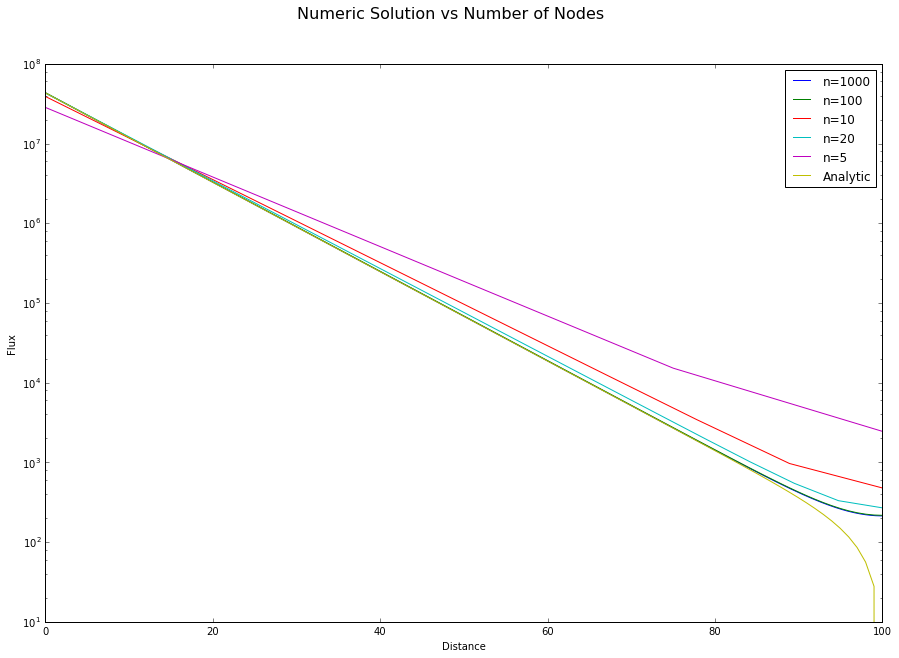

In [45]:
N_array = {5:'b-', 10:'r-', 20: 'g-', 100: '-', 1000: '-'}
log_fig = plt.figure(1)
for n, c in N_array.items():
    plt.plot(x(n), flux(nodes=n, w=W), label="n={0}".format(n))
plt.plot(x(100), phi_analytic(x(100), S=10**8.0, w=W, sigma=0.15), label="Analytic")
plt.yscale('log')
plt.legend(loc='upper right')
plt.suptitle("Numeric Solution vs Number of Nodes", size=16)
plt.ylabel("Flux")
plt.xlabel("Distance")
plt.show()

In [46]:
def phi_analytic_spherical(r, L, D, S):
    denominator = 8.0 * np.pi * D * r
    numerator = S * np.exp(-1.0 * r / L)
    return numerator / denominator

In [47]:
def phi_analytic_cylindrical(r, L, D, S):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-47-4fcaa668b0ef>, line 2)

In [ ]:
r = np.linspace(0, 100, 1000)
S = 10 ** 8.0
D = 9.0
sigma = 0.15
L = (D / sigma) ** 0.5
fig3 = plt.figure(1)

a = plt.subplot(111)
plt.plot(r[1:], phi_analytic_spherical(r[1:], L, D, S), label='Spherical')
plt.plot(r, phi_analytic(r, S=10**8.0, w=W, sigma=0.15), label='Cartesian')
plt.suptitle("Analytic Solution in Different Coordinate Systems", size=16)
plt.yscale('log')
plt.xlabel('Flux')
plt.ylabel('Distance')
plt.legend(loc='upper right')
plt.show()

## Now comparing the coordinate systems ##

In [ ]:
dir = "./rebuildmakeinstructions"
import os
import os.path
os.listdir(dir)